## PROBLEM STATEMENT 
# 4.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('TCS.csv')
df['14 Day sma'] = df['Close Price'].rolling(window=14).mean()
df['30 Day STD'] = df['Close Price'].rolling(window=20).std()
df['Upper Band'] = df['14 Day sma'] + (df['30 Day STD'] * 2)
df['Lower Band'] = df['14 Day sma'] - (df['30 Day STD'] * 2)
df = df.dropna()
df['Mid Band'] = (df['Upper Band'] + df['Lower Band']) / 2
df.head()


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day sma,30 Day STD,Upper Band,Lower Band,Mid Band
19,TCS,EQ,09-Jun-2017,2521.60,2520.0,2547.4,2486.0,2518.6,2507.00,2513.28,1574017,3.955950e+09,83931,599286,38.07,2572.610714,71.824613,2716.259941,2428.961488,2572.610714
20,TCS,EQ,12-Jun-2017,2507.00,2497.0,2512.9,2470.4,2484.9,2487.20,2487.48,813253,2.022948e+09,44849,306655,37.71,2570.146429,60.249637,2690.645703,2449.647154,2570.146429
21,TCS,EQ,13-Jun-2017,2487.20,2465.0,2481.1,2447.0,2450.0,2451.55,2464.89,587707,1.448635e+09,52410,268108,45.62,2562.460714,58.090647,2678.642008,2446.279421,2562.460714
22,TCS,EQ,14-Jun-2017,2451.55,2455.0,2476.0,2455.0,2465.4,2470.20,2469.41,744571,1.838651e+09,42987,456486,61.31,2551.432143,56.909942,2665.252026,2437.612259,2551.432143
23,TCS,EQ,15-Jun-2017,2470.20,2469.0,2469.7,2405.0,2410.0,2411.20,2427.94,1498599,3.638509e+09,65157,1140716,76.12,2539.500000,64.820537,2669.141074,2409.858926,2539.500000


In [2]:
def select_buy(df):
    if df['Close Price'] < df['Lower Band']:
        return "BUY"
    elif df['Close Price'] > df['Lower Band'] and df['Close Price'] < df['Mid Band']:
        return "Hold Buy/Liquidate Short"
    elif df['Close Price'] > df['Mid Band'] and df['Close Price'] < df['Upper Band']:
        return "Hold Short/Liquidate Buy"
    elif df['Close Price'] > df['Upper Band']:
        return "Short"
    
df = df.assign(call = df.apply(select_buy, axis=1))
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day sma,30 Day STD,Upper Band,Lower Band,Mid Band,call
19,TCS,EQ,09-Jun-2017,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,...,3.955950e+09,83931,599286,38.07,2572.610714,71.824613,2716.259941,2428.961488,2572.610714,Hold Buy/Liquidate Short
20,TCS,EQ,12-Jun-2017,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,...,2.022948e+09,44849,306655,37.71,2570.146429,60.249637,2690.645703,2449.647154,2570.146429,Hold Buy/Liquidate Short
21,TCS,EQ,13-Jun-2017,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,...,1.448635e+09,52410,268108,45.62,2562.460714,58.090647,2678.642008,2446.279421,2562.460714,Hold Buy/Liquidate Short
22,TCS,EQ,14-Jun-2017,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,...,1.838651e+09,42987,456486,61.31,2551.432143,56.909942,2665.252026,2437.612259,2551.432143,Hold Buy/Liquidate Short
23,TCS,EQ,15-Jun-2017,2470.20,2469.00,2469.70,2405.00,2410.00,2411.20,2427.94,...,3.638509e+09,65157,1140716,76.12,2539.500000,64.820537,2669.141074,2409.858926,2539.500000,Hold Buy/Liquidate Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,...,4.763441e+09,86096,975603,44.31,2161.478571,74.401631,2310.281834,2012.675309,2161.478571,Hold Buy/Liquidate Short
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,...,3.926902e+09,77713,781526,42.83,2171.360714,69.643943,2310.648600,2032.072829,2171.360714,Hold Buy/Liquidate Short
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,...,4.906405e+09,106297,1251459,55.27,2175.592857,67.073082,2309.739022,2041.446692,2175.592857,Hold Buy/Liquidate Short
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,...,4.409349e+09,85446,873181,42.81,2175.878571,65.064738,2306.008047,2045.749096,2175.878571,Hold Buy/Liquidate Short


In [12]:
# training classifier
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train_X = df[['Upper Band','Lower Band','Mid Band','Close Price']]
transformed_label = le.fit_transform(df[['call']])
train_Y = transformed_label.reshape(-1,1)

In [19]:
# LogisticRegression Model
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd
import os

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LR.predict(train_X)
print('Logistic Regression')
round(LR.score(train_X,train_Y), 4)

Logistic Regression


0.9582

In [24]:
# Support Vector Machine
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk
from sklearn import svm
import pandas as pd
import os

SVM = svm.LinearSVC()
SVM.fit(train_X,train_Y)
SVM.predict(train_X)
print('SVM Score')
round(SVM.score(train_X,train_Y), 4)

SVM Score


0.5908

In [28]:
# RandomForest classifier
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import os

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(train_X,train_Y)
RF.predict(train_X)
print('Random Forest')
round(RF.score(train_X,train_Y), 4)

Random Forest


0.6555

In [31]:
# Neural Network Classifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier
import pandas as pd
import os

MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
MLP.fit(train_X,train_Y)
MLP.predict(train_X)
print('Neural Network')
round(MLP.score(train_X,train_Y), 4)

Neural Network


0.5365

## PROBLEM STATEMENT
# 4.2

In [65]:
import pandas as pd
df = pd.read_csv('ITC.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,15-May-2017,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
1,ITC,EQ,16-May-2017,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2,ITC,EQ,17-May-2017,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
3,ITC,EQ,18-May-2017,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
4,ITC,EQ,19-May-2017,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57


In [77]:
df['% change in op_cl'] = ((df['Close Price'] - df['Open Price'])/(df['Close Price'])) * 100
df['% change in lw_hi'] = ((df['Low Price'] - df['High Price'])/(df['Low Price'])) * 100

df['% chng 5dymean'] = df['Close Price'].pct_change().dropna().rolling(5).mean()
df['% chng 5dystd'] = df['Close Price'].pct_change().dropna().rolling(5).mean()
df = df.dropna()
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,% change in op_cl,% change in lw_hi,% chng 5dymean,% chng 5dystd,Action,% chng 5dymean
15,ITC,EQ,05-Jun-2017,319.20,315.00,318.25,313.30,317.5,317.45,316.83,...,3.004339e+09,69774,6130621,64.65,0.771775,-1.579955,0.001064,0.001064,1.0,0.001064
16,ITC,EQ,06-Jun-2017,317.45,317.50,319.00,309.30,311.3,311.05,311.28,...,3.063364e+09,87515,6116482,62.15,-2.073622,-3.136114,-0.000182,-0.000182,-1.0,-0.000182
17,ITC,EQ,07-Jun-2017,311.05,311.30,314.75,310.35,311.7,312.25,313.15,...,3.611978e+09,91062,8921486,77.35,0.304243,-1.417754,0.000365,0.000365,1.0,0.000365
18,ITC,EQ,08-Jun-2017,312.25,313.00,313.25,309.40,311.2,311.60,310.82,...,2.418657e+09,111593,5953664,76.51,-0.449294,-1.244344,-0.001591,-0.001591,1.0,-0.001591
19,ITC,EQ,09-Jun-2017,311.60,310.75,312.60,304.70,305.7,306.00,307.40,...,3.094129e+09,103882,5925048,58.87,-1.552288,-2.592714,-0.008368,-0.008368,1.0,-0.008368


In [81]:
arr = []
val = []

for value in df['Close Price'].iteritems():
    arr.append(value[1])
    
for i in range(0,300):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)

df['Action'] = pd.DataFrame(val)
df = df.dropna()
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,% change in op_cl,% change in lw_hi,% chng 5dymean,% chng 5dystd,Action,% chng 5dymean
15,ITC,EQ,05-Jun-2017,319.20,315.00,318.25,313.30,317.50,317.45,316.83,...,3.004339e+09,69774,6130621,64.65,0.771775,-1.579955,0.001064,0.001064,-1.0,0.001064
16,ITC,EQ,06-Jun-2017,317.45,317.50,319.00,309.30,311.30,311.05,311.28,...,3.063364e+09,87515,6116482,62.15,-2.073622,-3.136114,-0.000182,-0.000182,1.0,-0.000182
17,ITC,EQ,07-Jun-2017,311.05,311.30,314.75,310.35,311.70,312.25,313.15,...,3.611978e+09,91062,8921486,77.35,0.304243,-1.417754,0.000365,0.000365,1.0,0.000365
18,ITC,EQ,08-Jun-2017,312.25,313.00,313.25,309.40,311.20,311.60,310.82,...,2.418657e+09,111593,5953664,76.51,-0.449294,-1.244344,-0.001591,-0.001591,1.0,-0.001591
19,ITC,EQ,09-Jun-2017,311.60,310.75,312.60,304.70,305.70,306.00,307.40,...,3.094129e+09,103882,5925048,58.87,-1.552288,-2.592714,-0.008368,-0.008368,-1.0,-0.008368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,ITC,EQ,18-Jul-2018,269.85,271.10,271.30,267.60,268.15,268.55,269.28,...,1.898492e+09,51220,4655530,66.03,-0.949544,-1.382661,-0.005219,-0.005219,1.0,-0.005219
296,ITC,EQ,19-Jul-2018,268.55,268.90,274.60,266.25,273.25,273.30,270.99,...,2.427206e+09,78638,5238088,58.48,1.609952,-3.136150,-0.002733,-0.002733,1.0,-0.002733
297,ITC,EQ,20-Jul-2018,273.30,273.25,274.80,270.65,274.35,274.00,273.32,...,1.796403e+09,53813,3190994,48.55,0.273723,-1.533346,0.002685,0.002685,1.0,0.002685
298,ITC,EQ,23-Jul-2018,274.00,279.50,286.65,277.15,283.95,284.15,283.57,...,7.388650e+09,147326,14378063,55.18,1.636460,-3.427747,0.009206,0.009206,1.0,0.009206


In [84]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_X = df[['% change in op_cl','% change in lw_hi','% chng 5dymean','% chng 5dystd']]
train_Y = df[['Action']]

# transformed_label = le.fit_transform(df[['call']])
# train_Y = transformed_label.reshape(-1,1)

import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(train_X,train_Y)
RF.predict(train_X)
print("Random forest")
round(RF.score(train_X,train_Y), 4)

Random forest


0.593

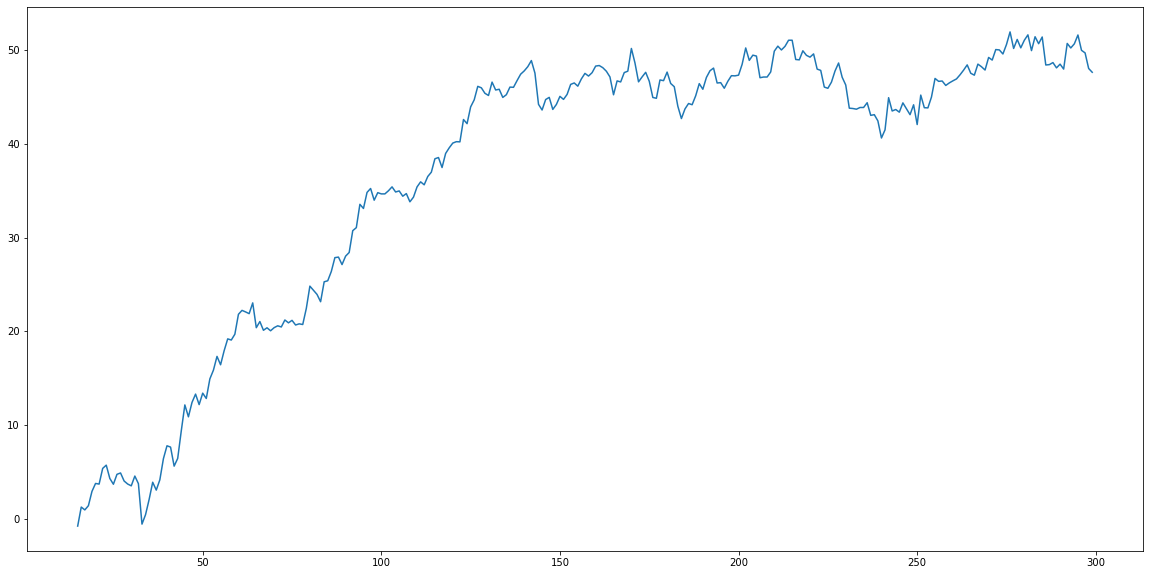

In [85]:
df['Net Cumulative returns'] = (((df['Open Price'] - df['Close Price'])/(df['Open Price'])) * 100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(df['Net Cumulative returns'])